## 1.Import the Libraries    

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions as EHF
from sklearn.ensemble import IsolationForest

## 2.Read the Training Data

In [2]:
File_path = r"H:\Projects\Flight-Price_Prediction\Data\Train.csv"

train = pd.read_csv(File_path)

In [3]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-06-24,Delhi,Cochin,13:00:00,19:15:00,375,1.0,No Info,8372
1,Jet Airways,2019-04-01,Banglore,Delhi,07:10:00,10:10:00,180,0.0,No Info,7229
2,Jet Airways,2019-06-01,Delhi,Cochin,09:40:00,04:25:00,1125,2.0,No Info,13014
3,Jet Airways,2019-04-21,Banglore,Delhi,15:15:00,18:10:00,175,0.0,No Info,7229
4,Vistara,2019-05-15,Banglore,Delhi,07:00:00,09:40:00,160,0.0,No Info,4668
...,...,...,...,...,...,...,...,...,...,...
635,Indigo,2019-06-27,Delhi,Cochin,14:25:00,17:40:00,195,0.0,No Info,5000
636,Jet Airways,2019-05-27,Delhi,Cochin,11:40:00,19:00:00,440,2.0,In-flight meal not included,19644
637,Jet Airways,2019-05-27,Delhi,Cochin,18:15:00,19:00:00,1485,1.0,In-flight meal not included,12898
638,Jet Airways,2019-03-18,Banglore,New Delhi,08:55:00,16:10:00,435,1.0,No Info,12284


In [4]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

-All the features are in the object Dtype. But Some of the features are in the `date $ time` change those futures into the data $ time Dtype.

In [5]:
train = train.assign(**{
    col : pd.to_datetime(train.loc[:,col] , dayfirst=True , format='mixed')
    for col in ['date_of_journey' , 'dep_time' , 'arrival_time']
})

In [6]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

## 3.High level summary data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [8]:
train.describe(include='number')

# train.describe()

,duration,total_stops,price
count,640.000000,640.00000,640.000000
mean,643.554688,0.82500,9086.337500
std,505.104752,0.65291,4464.825204
min,75.000000,0.00000,1965.000000
25%,175.000000,0.00000,5228.000000
50%,527.500000,1.00000,8398.500000
75%,916.250000,1.00000,12305.250000
max,2565.000000,3.00000,31783.000000


- Describing the categorical data

In [9]:
train.describe(include='O')

,airline,source,destination,additional_info
count,640,640,640,640
unique,8,5,6,4
top,Jet Airways,Delhi,Cochin,No Info
freq,214,271,271,511


- `total_stops` is numeric but we consider as object for real life observation    

In [10]:
(
    train
    .assign(total_stops = train['total_stops'].astype(object))
    .describe(include = 'O')           
            
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,4
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,214,271,271,351.0,511


## 4. High Level Analysis of outliers

- Isolation Forest is fast because it splits the data space randomly, using randomly selected attribute and randomly selected split point.

In [ ]:
forest = IsolationForest(n_estimators=10 , random_state = 42)

In [12]:
(
    train
    .assign(outlier = forest.fit_predict(train.drop(columns='price')
                                            .select_dtypes(include='number')))
    .query('outlier == -1 ')
    
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
2,Jet Airways,2019-06-01,Delhi,Cochin,2024-06-10 09:40:00,2024-06-10 04:25:00,1125,2.0,No Info,13014,-1
6,Indigo,2019-05-12,Kolkata,Banglore,2024-06-10 09:35:00,2024-06-10 12:20:00,165,0.0,No Info,4804,-1
15,Indigo,2019-05-21,Delhi,Cochin,2024-06-10 17:05:00,2024-06-10 22:15:00,310,1.0,No Info,6147,-1
18,Jet Airways,2019-03-21,Delhi,Cochin,2024-06-10 19:10:00,2024-06-10 04:25:00,1995,2.0,In-flight meal not included,8834,-1
19,Air India,2019-05-27,Delhi,Cochin,2024-06-10 18:00:00,2024-06-10 19:15:00,1515,1.0,No Info,8372,-1
...,...,...,...,...,...,...,...,...,...,...,...
629,Multiple Carriers,2019-06-09,Delhi,Cochin,2024-06-10 11:40:00,2024-06-10 01:30:00,830,1.0,No Info,6795,-1
632,Air India,2019-06-06,Kolkata,Banglore,2024-06-10 08:20:00,2024-06-10 07:55:00,1415,2.0,No Info,10697,-1
635,Indigo,2019-06-27,Delhi,Cochin,2024-06-10 14:25:00,2024-06-10 17:40:00,195,0.0,No Info,5000,-1
636,Jet Airways,2019-05-27,Delhi,Cochin,2024-06-10 11:40:00,2024-06-10 19:00:00,440,2.0,In-flight meal not included,19644,-1


## 5.Pair ploats

- pair_plot show the all numeric feature in scatter plot chart form
  

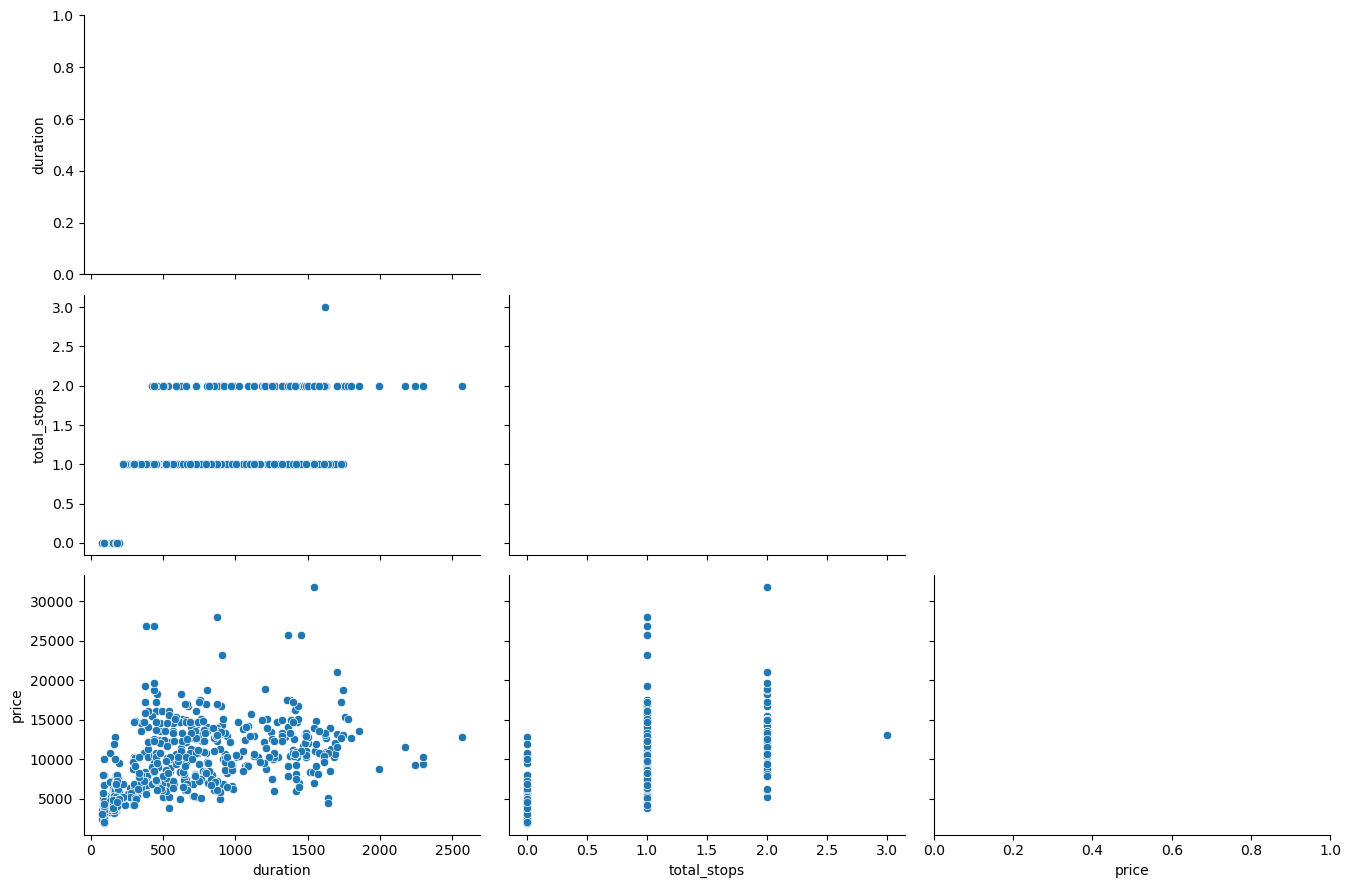

In [13]:
EHF.pair_plots(train)

## 6. Correlation Analysis

- In this phase of the analysis we check relation between the feature

C:\Users\dhrup\anaconda3\envs\test_env\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


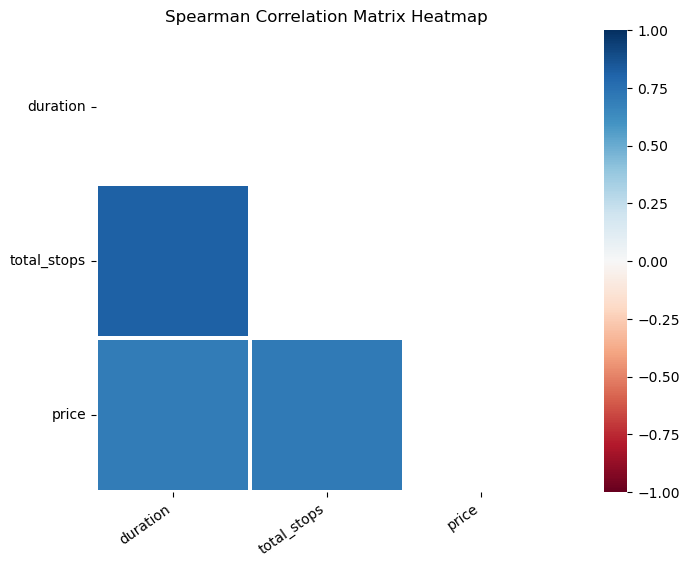

In [14]:
EHF.correlation_heatmap(train)

##### Spearman Correlation
- The coefficient can be used to determine how well data fits a model or to determine the similarity of text documents.
- The Spearman correlation coefficient is defined as the Pearson correlation coefficient between the rank variables.

In [15]:
train.corr(method='spearman' , numeric_only=True)

,duration,total_stops,price
duration,1.000000,0.816194,0.701219
total_stops,0.816194,1.000000,0.703697
price,0.701219,0.703697,1.000000


C:\Users\dhrup\anaconda3\envs\test_env\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


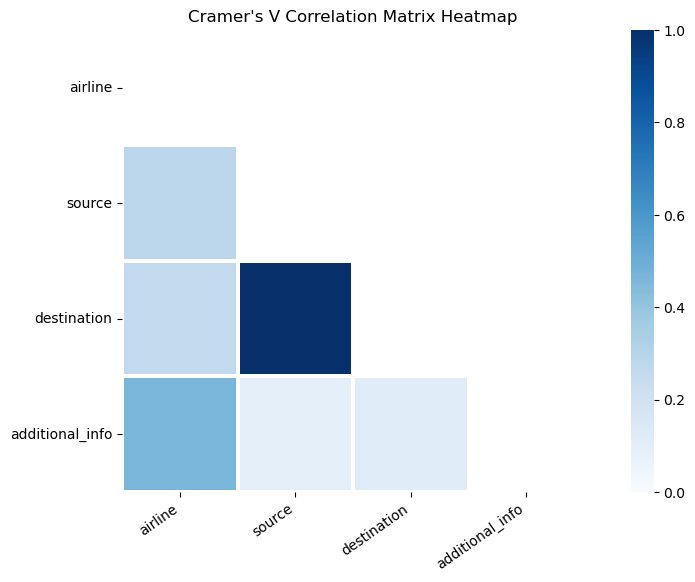

In [16]:
EHF.cramersV_heatmap(train)

## 8. Detailed Analysis

#### 8.1 airline

In [17]:
train.airline

0        Air India
1      Jet Airways
2      Jet Airways
3      Jet Airways
4          Vistara
          ...     
635         Indigo
636    Jet Airways
637    Jet Airways
638    Jet Airways
639    Jet Airways
Name: airline, Length: 640, dtype: object

In [18]:
EHF.cat_summary(train , 'airline')

0        Air India
1      Jet Airways
2      Jet Airways
3      Jet Airways
4          Vistara
          ...     
635         Indigo
636    Jet Airways
637    Jet Airways
638    Jet Airways
639    Jet Airways
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,214


,count,percentage
category,,
Jet Airways,214,0.334375
Indigo,129,0.201563
Air India,109,0.170313
Multiple Carriers,88,0.137500
Spicejet,46,0.071875
Vistara,30,0.046875
Air Asia,17,0.026562
Goair,7,0.010937


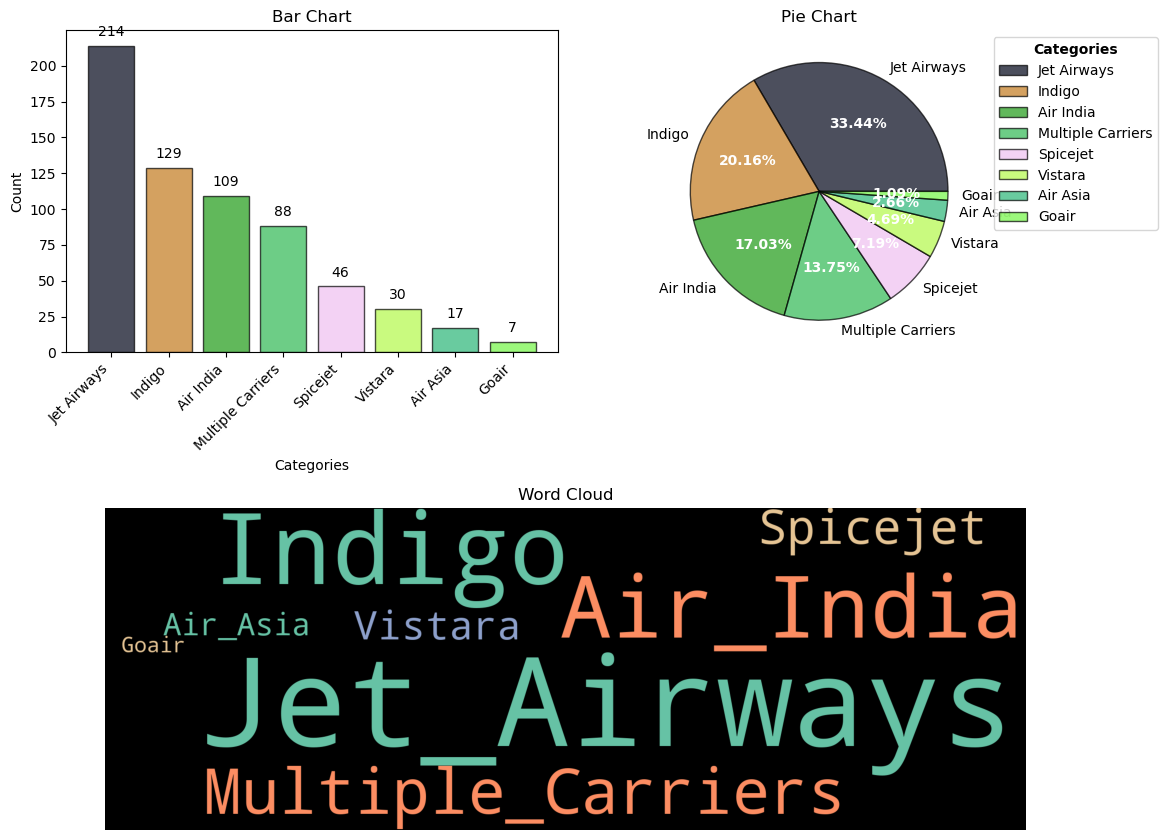

In [19]:
EHF.cat_univar_plots(train, 'airline')

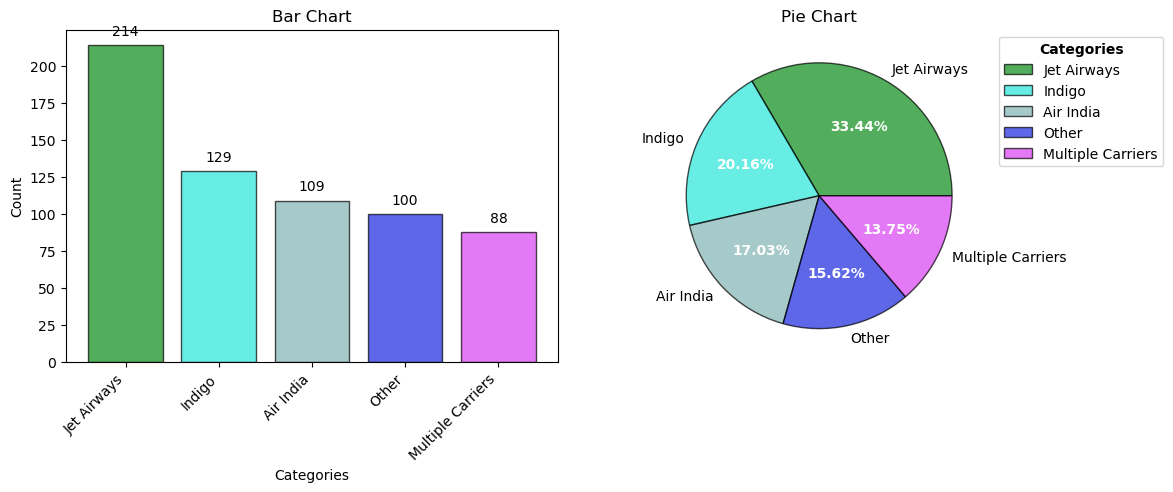

In [20]:
EHF.cat_univar_plots(train, 'airline' , show_wordcloud=False ,k=4)

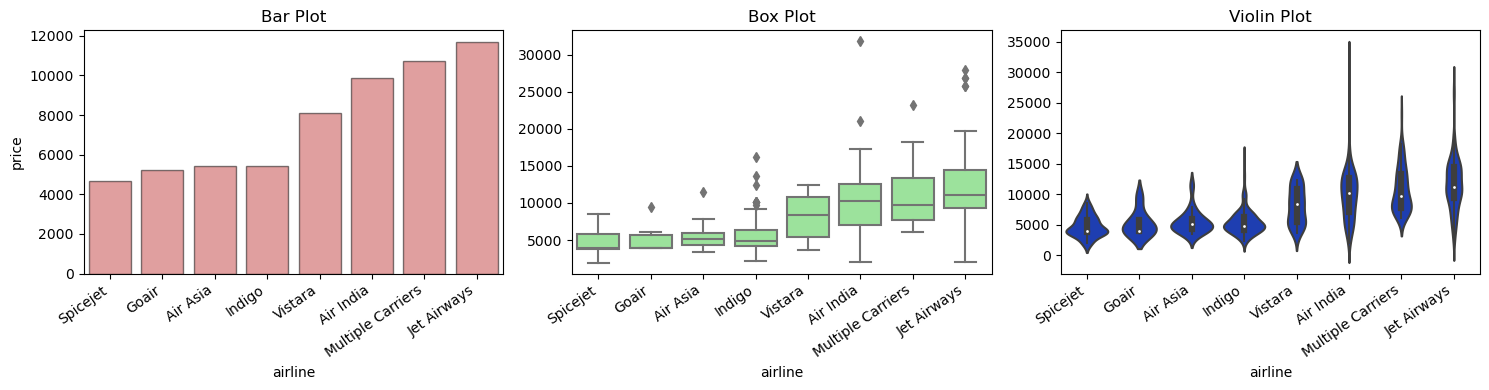

In [21]:
 EHF.num_cat_bivar_plots(data = train, num_var= 'price' ,  cat_var= 'airline')

In [22]:
EHF.num_cat_hyp_testing(train , num_var='price' , cat_var='airline')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 53.09105255806766
- p-value              : 1.5457687296132984e-59
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 283.28823356537544
- p-value              : 2.2327507861737977e-57
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


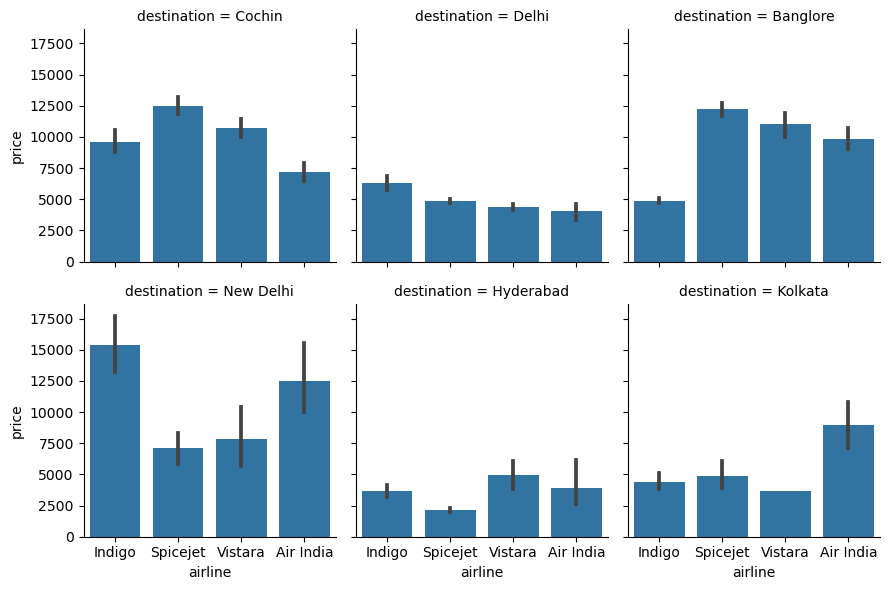

In [23]:
airline_grid = sns.FacetGrid(data = train , col = 'destination' , col_wrap=3 , sharey=True)

airline_grid.map(sns.barplot , 'airline' , 'price')

#### 8.2 Date_of_journey

In [24]:
train.date_of_journey.dtype

dtype('<M8[ns]')

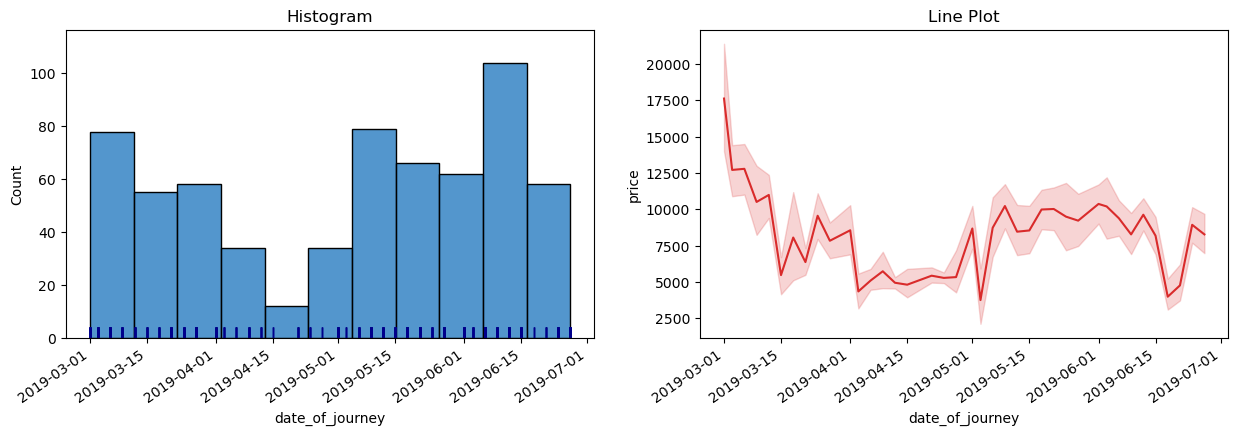

In [25]:
EHF.dt_univar_plots(
    data = train,
    var = 'date_of_journey', 
    target = 'price'
)

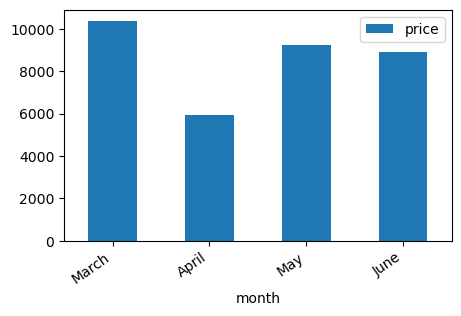

In [26]:
(
    train
    .groupby(pd.Grouper(key ='date_of_journey' , freq = "M"))
    .price.mean()
    .to_frame()
    .set_axis(['March' , 'April' , 'May' , 'June'] , axis = 0)
    .rename_axis(index='month')
    .plot(
        kind = 'bar',
        figsize = (5 , 3)
    )
)

axis = plt.gca()  # This is for the get current axis
EHF.rotate_xlabels(axis)

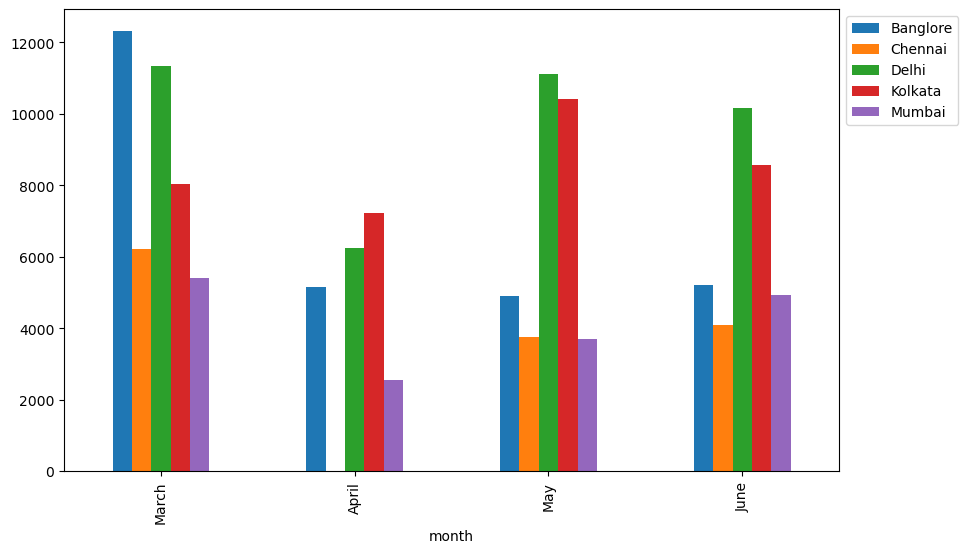

In [27]:
(
    train
    .groupby([pd.Grouper(key='date_of_journey', freq = 'M') , 'source'])
    .price.mean()
    .unstack(fill_value = 0) # This is use for the convert row to column
     .set_axis(['March' , 'April' , 'May' , 'June'] , axis = 0)
    .rename_axis(index='month')
    .plot(
        kind = 'bar',
        figsize = (10 , 6)
    )
)

ax = plt.gca()

ax.legend(
    loc = "upper left"  ,
    bbox_to_anchor = (1 , 1)
    
)

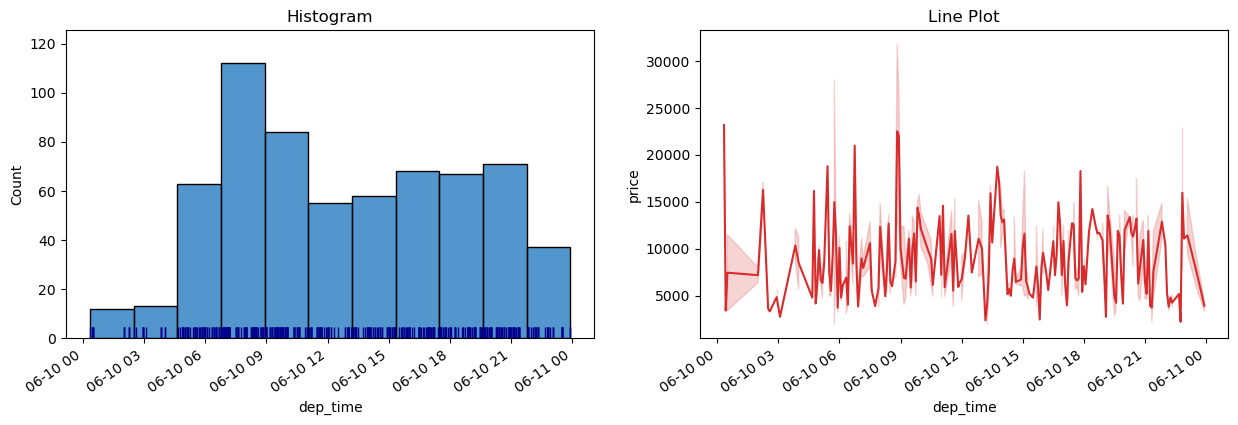

In [28]:
EHF.dt_univar_plots(train , 'dep_time' , 'price')

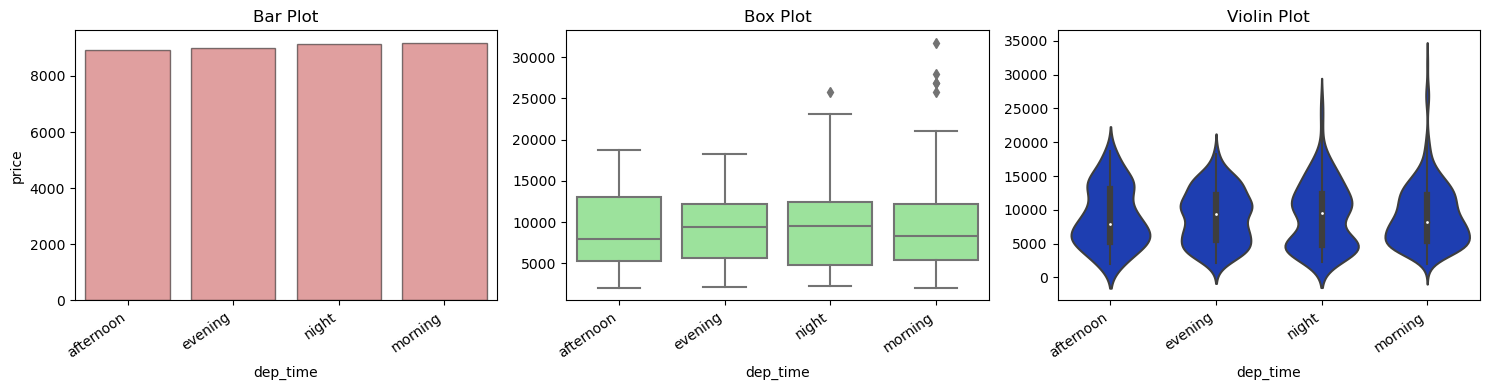

In [29]:
(
    train
    .assign(dep_time = lambda ser: (
            np.select([ser.dep_time.dt.hour.between(4,12 , inclusive = 'left'),
                       ser.dep_time.dt.hour.between(12,16 , inclusive = 'left'),
                       ser.dep_time.dt.hour.between(16,20 , inclusive = 'left') ],
                      ['morning','afternoon','evening',],
                      default = 'night')
    ))
    .pipe(EHF.num_cat_bivar_plots , 'price' , 'dep_time')
)

#### duration

In [90]:
EHF.num_summary(train , 'duration')

0       375
1       180
2      1125
3       175
4       160
       ... 
635     195
636     440
637    1485
638     435
639     180
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,140.00
25,175.00
50,527.50
75,916.25
90,1430.00
95,1610.25
99,1833.55


,value
mean,643.554688
trimmed mean (5%),610.390625
trimmed mean (10%),584.550781
median,527.500000


,value
var,255130.810776
std,505.104752
IQR,741.250000
mad,357.500000
coef_variance,0.784867


,value
skewness,0.888257
kurtosis,-0.020503


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 9.383792939362268e-21
Test Statistic       : 0.8921743631362915
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 22.11576659057539
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [91]:
train.duration.quantile([0.25, 0.5, 0.75])


0.25    175.00
0.50    527.50
0.75    916.25
Name: duration, dtype: float64

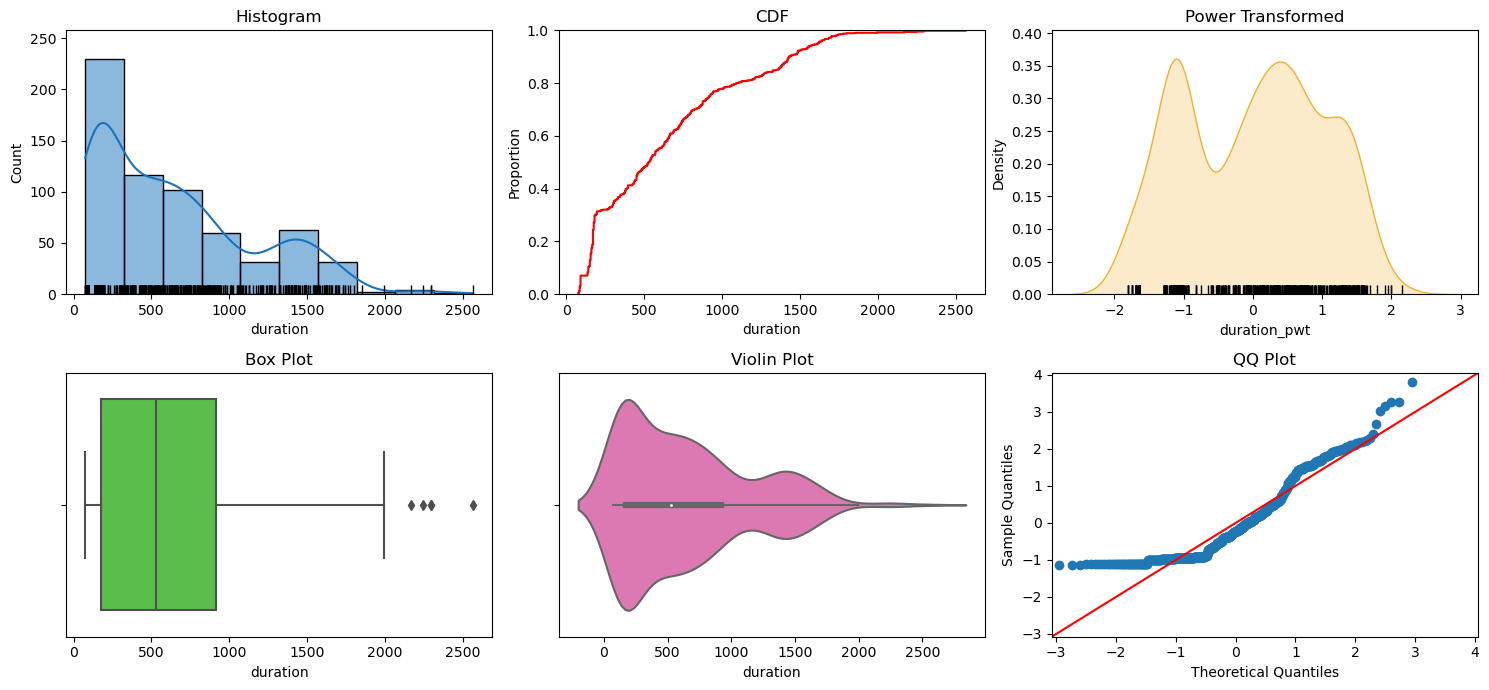

In [94]:
EHF.num_univar_plots(train, "duration")

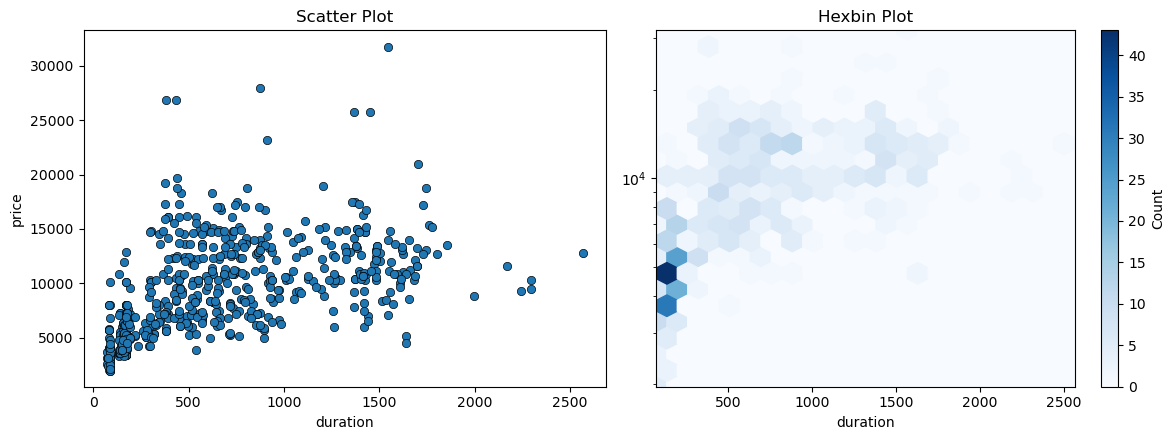

In [96]:
EHF.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [97]:
EHF.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5498383122677755
- p-value              : 7.647029878062192e-52
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7012193397008625
- p-value              : 7.994443596297701e-96
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


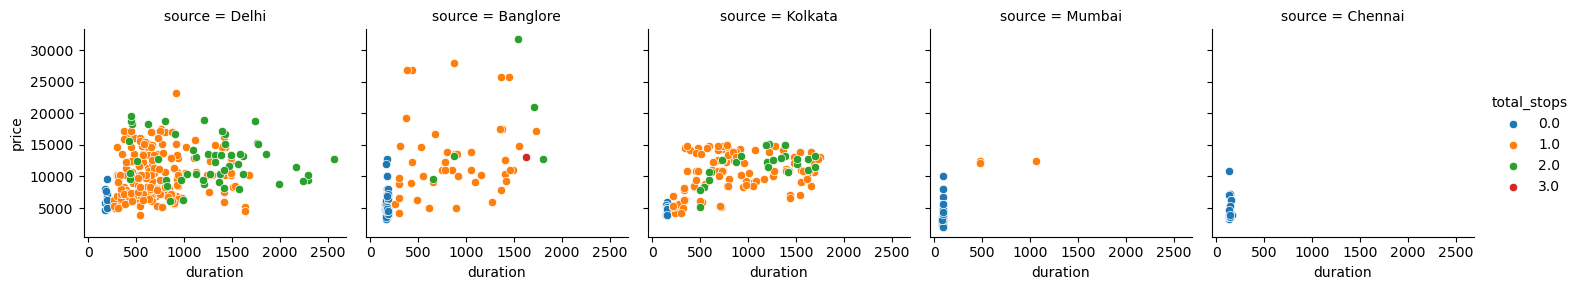

In [98]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

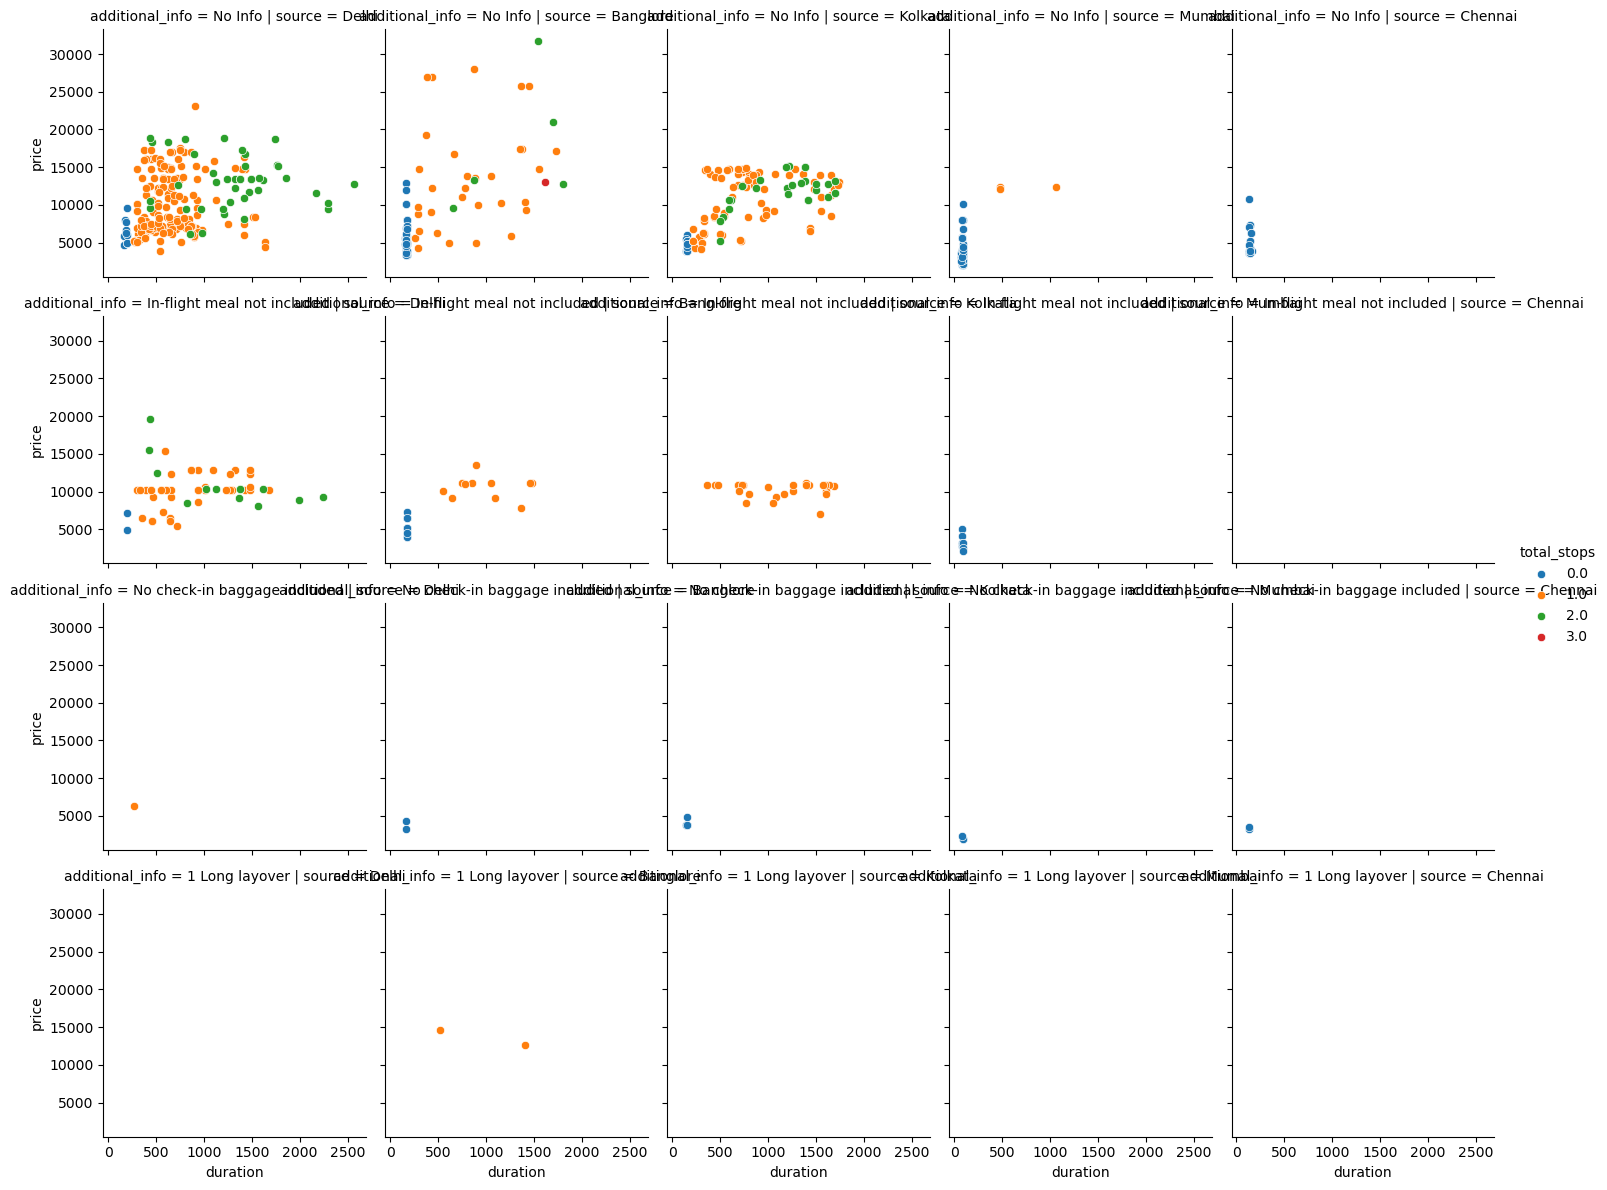

In [99]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [101]:
EHF.get_iqr_outliers(train, "duration")

Lower Limit : -936.875
Upper Limit : 2028.125


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
214,Air India,2019-03-03,Delhi,Cochin,2024-06-09 07:05:00,2024-06-09 19:15:00,2170,2.0,No Info,11552
399,Jet Airways,2019-03-27,Delhi,Cochin,2024-06-09 06:20:00,2024-06-09 19:45:00,2245,2.0,In-flight meal not included,9296
294,Air India,2019-06-12,Delhi,Cochin,2024-06-09 05:00:00,2024-06-09 19:15:00,2295,2.0,No Info,9443
307,Air India,2019-03-06,Delhi,Cochin,2024-06-09 05:00:00,2024-06-09 19:15:00,2295,2.0,No Info,10283
546,Jet Airways,2019-03-21,Delhi,Cochin,2024-06-09 09:40:00,2024-06-09 04:25:00,2565,2.0,No Info,12819


In [103]:
EHF.cat_summary(train, "additional_info")

0                          No Info
1                          No Info
2                          No Info
3                          No Info
4                          No Info
                  ...             
635                        No Info
636    In-flight meal not included
637    In-flight meal not included
638                        No Info
639    In-flight meal not included
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 4 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,4
top,No Info
freq,511


,count,percentage
category,,
No Info,511,0.798438
In-flight meal not included,112,0.175000
No check-in baggage included,15,0.023438
1 Long layover,2,0.003125


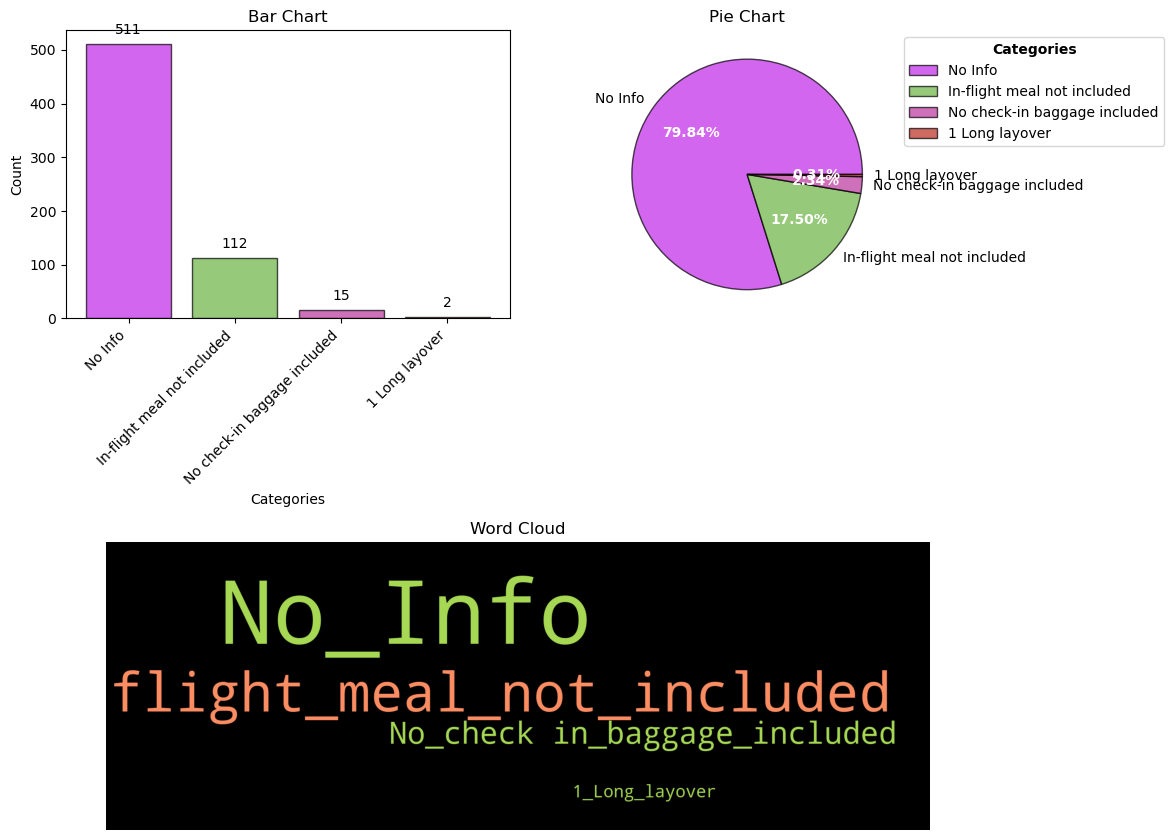

In [104]:
EHF.cat_univar_plots(train, "additional_info")

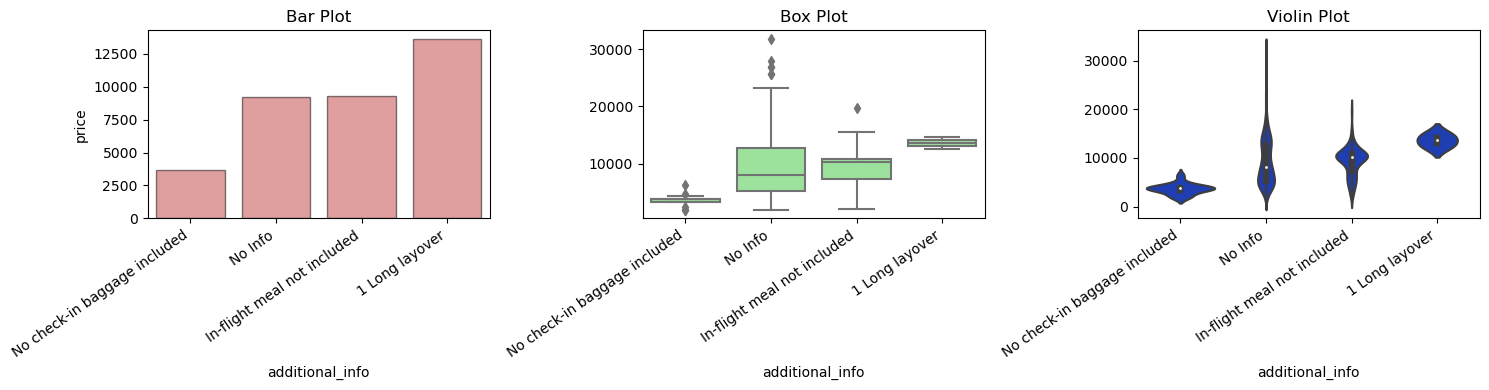

In [106]:
EHF.num_cat_bivar_plots(train, "price", "additional_info")

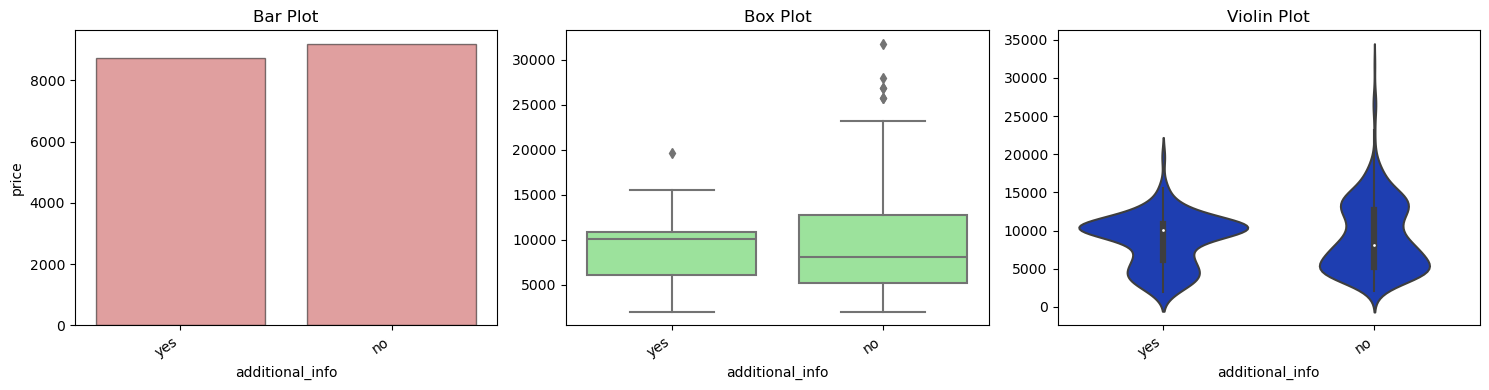

In [108]:
# convertion additional_info into a binary feature for analysis

(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(EHF.num_cat_bivar_plots, "price", "additional_info")
)

In [31]:
EHF.get_iqr_outliers(train , 'duration')

Lower Limit : -936.875
Upper Limit : 2028.125


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
214,Air India,2019-03-03,Delhi,Cochin,2024-06-10 07:05:00,2024-06-10 19:15:00,2170,2.0,No Info,11552
399,Jet Airways,2019-03-27,Delhi,Cochin,2024-06-10 06:20:00,2024-06-10 19:45:00,2245,2.0,In-flight meal not included,9296
294,Air India,2019-06-12,Delhi,Cochin,2024-06-10 05:00:00,2024-06-10 19:15:00,2295,2.0,No Info,9443
307,Air India,2019-03-06,Delhi,Cochin,2024-06-10 05:00:00,2024-06-10 19:15:00,2295,2.0,No Info,10283
546,Jet Airways,2019-03-21,Delhi,Cochin,2024-06-10 09:40:00,2024-06-10 04:25:00,2565,2.0,No Info,12819
